In [1]:
import os
import sys
from pathlib import Path

# Automatically find the project root (where "src/" and "saved_weights/" exist)
def find_project_root(marker_dirs=("src", "saved_weights")):
    path = Path.cwd()
    while path != path.parent:
        if all((path / d).exists() for d in marker_dirs):
            return path
        path = path.parent
    raise RuntimeError("Project root not found. Are you inside the mils-pruning directory tree?")

project_root = find_project_root()
os.chdir(project_root)
sys.path.insert(0, str(project_root / "src"))  # ensures mils_pruning is importable

print(f"Working directory set to: {os.getcwd()}")


Working directory set to: /Users/eyujisgmail.com/Documents/mils-pruning


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from mils_pruning import BinarizedMLP, train, EarlyStopping, get_mnist_data_loaders


In [3]:
num_runs = 10  # You can change this to any number
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [4]:
nodes_h1 = 32
nodes_h2 = 32 

In [5]:
# Create data loaders once with fixed splits
train_loaders, val_loader, test_loader = get_mnist_data_loaders(num_runs=num_runs)

In [6]:
# seeds = list(range(num_runs))

# # Define architecture parameters first
# nodes_h1 = 32
# nodes_h2 = 32
# arch_tag = f"arch_{nodes_h1}_{nodes_h2}"

# for run_idx, seed in enumerate(seeds):
#     torch.manual_seed(seed)
#     np.random.seed(seed)

#     model = BinarizedMLP(input_shape=(10, 10), nodes_h1=nodes_h1, nodes_h2=nodes_h2).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=1e-3)
#     criterion = nn.CrossEntropyLoss()
#     early_stopping = EarlyStopping(patience=5, min_delta=0)

#     # Use arch_tag and run index to form experiment_id
#     experiment_id = f"{arch_tag}_run{run_idx}"

#     train(
#         model=model,
#         train_loader=train_loaders[run_idx],
#         val_loader=val_loader,
#         optimizer=optimizer,
#         criterion=criterion,
#         early_stopping=early_stopping,
#         epochs=50,
#         device=device,
#         experiment_id=experiment_id
#     )


In [7]:
# from mils_pruning import run_node_pruning_experiments

# run_node_pruning_experiments(
#     arch_tag="arch_32_32",
#     num_runs=10,
#     max_removal_ratio=0.25,
#     prune_step=1,
#     strategies=[
#         "min_increase", "max_increase",
#         "min_absolute", "max_absolute",
#         "min_decrease", "max_decrease"
#     ],
#     test_loader=test_loader,
#     device=device
# )


In [8]:
from mils_pruning import run_weight_pruning_experiments

run_weight_pruning_experiments(
    arch_tag="arch_32_32",
    num_runs=10,
    max_removal_ratio=0.10,
    prune_step=1,
    strategies=[],
    test_loader=test_loader,
    device=device
)


Pruning (selective_random_percent_005_run9): 100%|██████████| 455/455 [33:55<00:00,  4.47s/it]


In [ ]:
from mils_pruning import plot_single_run

plot_single_run(
    arch_tag="arch_32_32",
    level="weight",
    names=[
        "min_increase"
    ],
    run_idx=0,
    prune_step=1,
)


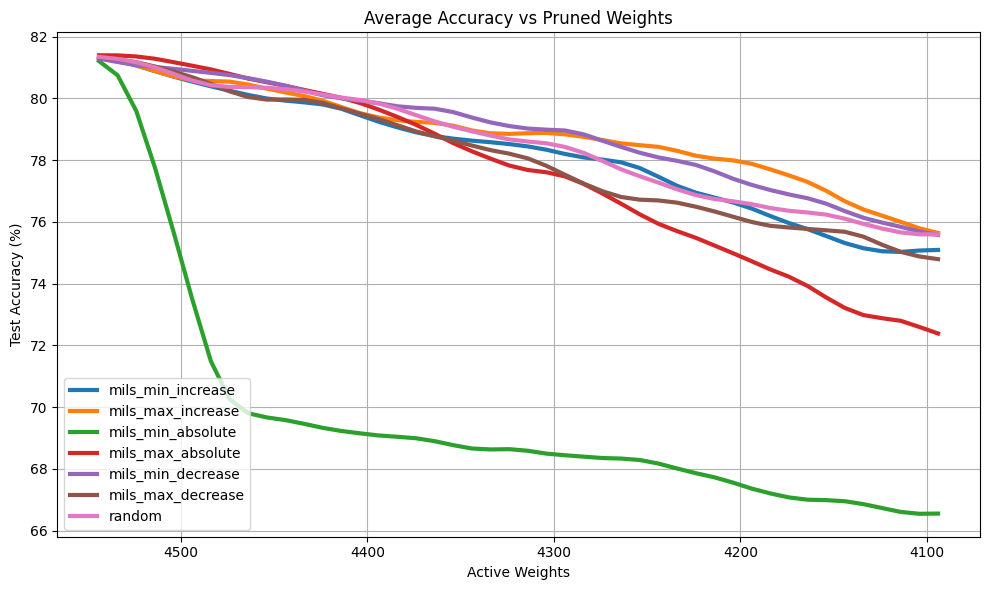

In [ ]:
from mils_pruning import plot_averaged_results

plot_averaged_results(
    arch_tag="arch_32_32",
    level="weight",
    names=[
        "mils_min_increase", "mils_max_increase",
        "mils_min_absolute", "mils_max_absolute",
        "mils_min_decrease", "mils_max_decrease",
        "random"
    ],
    num_runs=10,
    prune_step=10,
    sigma=1,
    show_ci=False
)